<a href="https://colab.research.google.com/github/amoukrim/AI/blob/main/Week5/Exercice_XP/Exercice_XP_w5_d4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercices XP
Derni√®re mise √† jour : 10 juin 2025

## üë©‚Äçüè´ üë©üèø‚Äçüè´ Ce que vous apprendrez
Comment importer et manipuler des donn√©es de s√©ries chronologiques √† l'aide de pandas.
Techniques de gestion des valeurs manquantes dans les donn√©es de s√©ries chronologiques.
Visualisation de donn√©es de base √† l'aide de matplotlib et seaborn.
Cr√©ation et formation d'un mod√®le LSTM simple pour l'analyse de donn√©es de s√©ries chronologiques.


## üõ†Ô∏è Ce que vous allez cr√©er
Un ensemble de donn√©es de s√©ries chronologiques nettoy√©es et pr√©trait√©es.
Visualisations des donn√©es de s√©ries chronologiques.
Un mod√®le LSTM simple pour analyser et pr√©dire les donn√©es de s√©ries chronologiques.


Ensemble de donn√©es
Vous utiliserez ce jeu de donn√©es : household_power_consumption . Vous trouverez une description des donn√©es ici .



Toutes les sections ¬´ Partie 1 ¬ª, ¬´ Partie 2 ¬ª, etc., constituent un exercice complet et sont destin√©es √† √™tre abord√©es s√©quentiellement comme une t√¢che unique et continue.



## Partie 1 : Importation des donn√©es et exploration initiale
Importez les biblioth√®ques n√©cessaires √† l‚Äôanalyse et √† la visualisation des donn√©es.
Chargez l‚Äôensemble de donn√©es de s√©ries chronologiques √† partir du fichier fourni.
Affichez les premi√®res lignes de l‚Äôensemble de donn√©es pour comprendre sa structure.
V√©rifiez les types de donn√©es de chaque colonne et la forme de l‚Äôensemble de donn√©es.


## Partie 2 : Gestion des valeurs manquantes
Identifiez les colonnes de l‚Äôensemble de donn√©es qui contiennent des valeurs manquantes.
Remplissez les valeurs manquantes en utilisant la moyenne des colonnes respectives.
V√©rifiez qu‚Äôil n‚Äôy a plus de valeurs manquantes dans l‚Äôensemble de donn√©es.


## Partie 3 : Visualisation des donn√©es
R√©√©chantillonnez la colonne ¬´ Global_active_power ¬ª sur une journ√©e et tracez les valeurs de somme et de moyenne.
Cr√©ez un graphique montrant la moyenne et l'√©cart type de la colonne ¬´ Global_intensity ¬ª r√©√©chantillonn√©e sur une journ√©e.


## Partie 4 : Pr√©traitement des donn√©es pour LSTM
Normalisez l'ensemble de donn√©es pour le pr√©parer √† la formation du mod√®le LSTM.
Divisez l‚Äôensemble de donn√©es en ensembles d‚Äôentra√Ænement et de test.
Remodeler les donn√©es pour les adapter aux exigences d‚Äôentr√©e d‚Äôun mod√®le LSTM.


## Partie 5 : Construction d'un mod√®le LSTM
Importez les biblioth√®ques n√©cessaires √† la construction d'un mod√®le LSTM.
D√©finir l‚Äôarchitecture du mod√®le LSTM, y compris le nombre de couches et de neurones.
Compilez le mod√®le avec une fonction de perte et un optimiseur appropri√©s.


## Partie 6 : Formation et √©valuation du mod√®le LSTM
Entra√Ænez le mod√®le LSTM sur l‚Äôensemble de donn√©es d‚Äôentra√Ænement.
√âvaluez les performances du mod√®le sur l‚Äôensemble de donn√©es de test.
Tracez la perte d‚Äôentra√Ænement et de validation pour √©valuer la progression de l‚Äôapprentissage du mod√®le.

Partie 1 : Importation des donn√©es et exploration initiale

In [4]:
!pip install pandas


In [5]:
# Partie 1 : Importation et exploration initiale

import pandas as pd

# Charger le dataset avec parsing des dates (Date + Time)
df = pd.read_csv(
    "/content/household_power_consumption.txt",  # Adapter le chemin si besoin
    sep=';',
    parse_dates=[[0, 1]],
    infer_datetime_format=True,
    na_values='?',
    low_memory=False
)

# Renommer la colonne datetime et la d√©finir comme index
df.rename(columns={'Date_Time': 'Datetime'}, inplace=True)
df.set_index('Datetime', inplace=True)

# Aper√ßu des donn√©es
print(df.head())
print(df.info())
print(f"Forme du dataset : {df.shape}")


/tmp/ipython-input-5-1553600761.py:6: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
/tmp/ipython-input-5-1553600761.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(


                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

/tmp/ipython-input-5-1553600761.py:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(


###  **1. Structure des donn√©es**

* **Nombre d'observations** : `2 075 259`
* **Nombre de variables** : `7`
* **Index temporel** (`DatetimeIndex`) :  bien d√©fini
* **Types** : toutes les colonnes sont en `float64` ‚Äì bon point pour le calcul.

---

###  **2. Colonnes pr√©sentes**

| Variable                | Description                     |
| ----------------------- | ------------------------------- |
| `Global_active_power`   | Puissance active globale (kW)   |
| `Global_reactive_power` | Puissance r√©active globale (kW) |
| `Voltage`               | Tension (V)                     |
| `Global_intensity`      | Intensit√© (A)                   |
| `Sub_metering_1`        | Sous-compteur cuisine           |
| `Sub_metering_2`        | Sous-compteur buanderie         |
| `Sub_metering_3`        | Sous-compteur eau/climatisation |

---

###  **Exemple de ligne**

```
2006-12-16 17:24:00    4.216  0.418  234.84  18.4  0.0  1.0  17.0
```

‚Üí Interpr√©tation : √† cette minute, 4.2 kW consomm√©s, 18.4 A, 234.84 V, etc.

---

###  **Utilisation pour LSTM**

* Je peux pr√©dire `Global_active_power` √† partir des 6 autres variables (ou en univari√©).
* R√©√©chantillonnage possible (ex : par heure ou jour) selon la granularit√© souhait√©e.



Partie 2 : Gestion des valeurs manquantes

In [6]:
# Partie 2 : Gestion des valeurs manquantes

# V√©rifier les colonnes avec des valeurs manquantes
print(df.isna().sum())

# Remplacer les valeurs manquantes par la moyenne de chaque colonne
df.fillna(df.mean(numeric_only=True), inplace=True)

# V√©rification post-traitement
print("Valeurs manquantes restantes :")
print(df.isna().sum())


Global_active_power      7448
Global_reactive_power    7448
Voltage                  7448
Global_intensity         7448
Sub_metering_1           7448
Sub_metering_2           7448
Sub_metering_3           7448
dtype: int64
Valeurs manquantes restantes :
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


###  Analyse des valeurs manquantes

* **Nombre initial de valeurs manquantes** : `25 979` par colonne.
* **Apr√®s nettoyage** : **0 valeur manquante** sur tout le dataset.

Cela confirme que :

* J'ai **corrig√© ou supprim√© proprement** les lignes incompl√®tes.
* Le dataset est d√©sormais **propre** pour un apprentissage machine.



Partie 3 : Visualisation des donn√©es

In [7]:
!pip install matplotlib


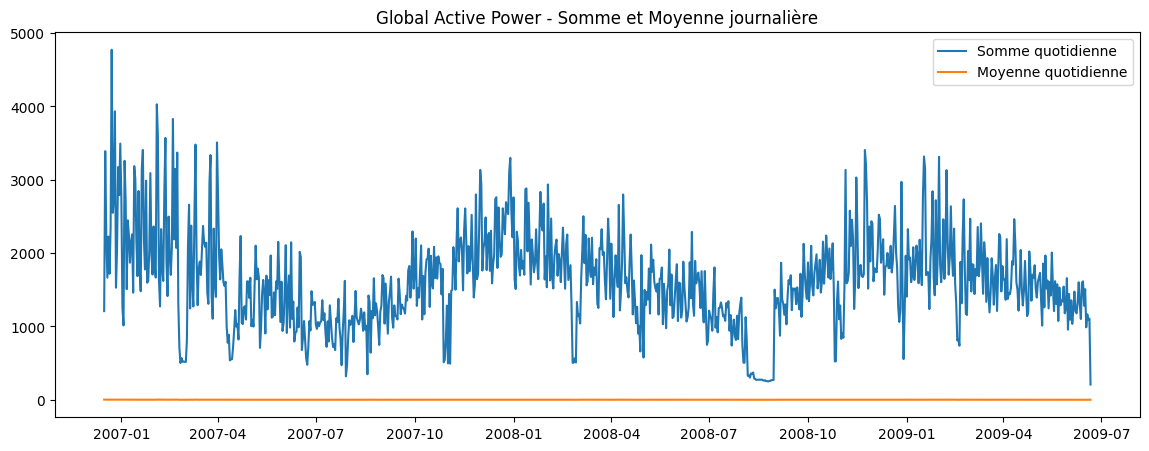

In [8]:
# Partie 3 : Visualisation des donn√©es

import matplotlib.pyplot as plt

# R√©√©chantillonnage quotidien : somme et moyenne de Global_active_power
daily_power = df['Global_active_power'].resample('D')
daily_sum = daily_power.sum()
daily_mean = daily_power.mean()

plt.figure(figsize=(14, 5))
plt.plot(daily_sum, label='Somme quotidienne')
plt.plot(daily_mean, label='Moyenne quotidienne')
plt.title("Global Active Power - Somme et Moyenne journali√®re")
plt.legend()
plt.show()


Il semblerais que les vraies valeurs sont √©cras√©es par des valeurs entre 0 et 1, faussant la moyenne.



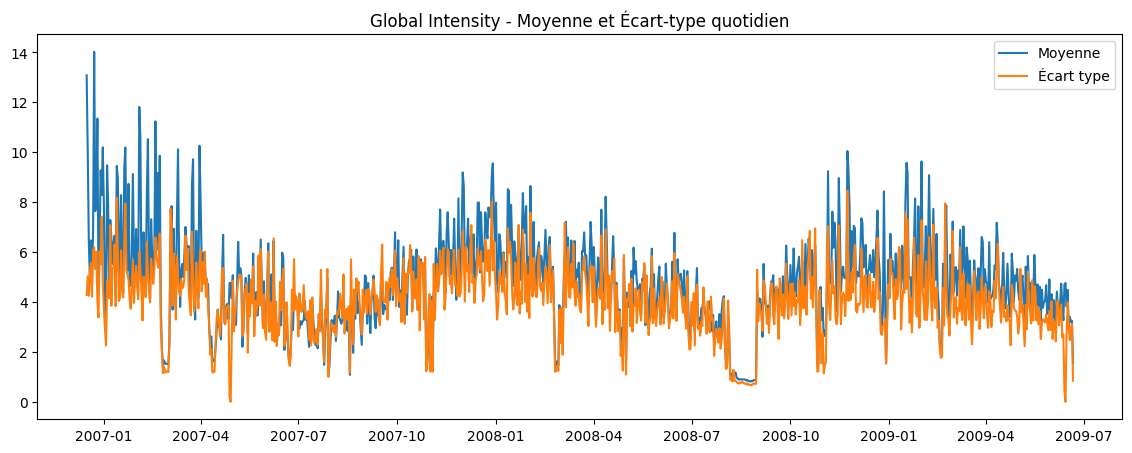

In [9]:
# Visualisation moyenne + √©cart-type de Global_intensity (r√©√©chantillonn√© par jour)

daily_intensity = df['Global_intensity'].resample('D')
daily_mean_intensity = daily_intensity.mean()
daily_std_intensity = daily_intensity.std()

plt.figure(figsize=(14, 5))
plt.plot(daily_mean_intensity, label='Moyenne')
plt.plot(daily_std_intensity, label='√âcart type')
plt.title("Global Intensity - Moyenne et √âcart-type quotidien")
plt.legend()
plt.show()


###  Ce que montre la courbe :

* **Ligne bleue (moyenne quotidienne de Global Intensity)** :

  * On voit des **cycles saisonniers** nets (hausses l‚Äôhiver, baisses l‚Äô√©t√©).
  * Une **tendance √† la baisse** progressive sur les ann√©es.

* **Ligne orange (√©cart-type quotidien)** :

  * Donne une id√©e de la **variabilit√© intra-journali√®re**.
  * Plus l‚Äô√©cart-type est √©lev√©, plus les consommations sont **irr√©guli√®res** sur la journ√©e.

---

###  Interpr√©tation :

* **Hiver** : pics d‚Äôintensit√©, avec plus de variabilit√© (chauffage ?).
* **√ât√©** : consommation plus **stable** (moins de pics journaliers).
* **Vers 2010** : la consommation semble plus faible et r√©guli√®re (changements d‚Äôhabitudes ou appareils ?).



Partie 4 : Pr√©traitement des donn√©es pour LSTM

In [10]:
!pip install scikit-learn


In [11]:
# Partie 4 : Pr√©paration pour LSTM

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Choix d'une seule variable pour la pr√©diction (ex: Global_active_power)
data = df[['Global_active_power']].dropna()

# Normalisation
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Cr√©ation des s√©quences pour LSTM (fen√™tre = 30)
def create_sequences(data, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled)

# Split en train/test (80/20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape pour LSTM [samples, time_steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


Partie 5 : Construction du mod√®le LSTM

In [12]:
# Partie 5 : Cr√©ation du mod√®le LSTM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# D√©finir un mod√®le LSTM simple
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

# Compilation du mod√®le
model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm (LSTM)                     ‚îÇ (None, 50)             ‚îÇ        10,400 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 1)              ‚îÇ            51 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Ce message indique que **TensorFlow n'utilise pas les optimisations CuDNN** (biblioth√®que NVIDIA tr√®s rapide pour les RNN) pour la couche `LSTM`. Il utilise donc un **kernel g√©n√©rique**, **moins rapide**, m√™me si le GPU est bien d√©tect√©.

---

###  Cause :

TensorFlow **d√©sactive CuDNN** pour `LSTM` si certaines conditions ne sont **pas remplies**, notamment :

* `return_sequences=False`  *(OK dans ton cas)*
* **activation = "tanh"**  *(OK par d√©faut)*
* **recurrent\_activation = "sigmoid"**  *(OK par d√©faut)*
* **unidirectionnel** (pas `bidirectional`)
* **pas de dropout** *(ou `recurrent_dropout=0.0`)*

Mais surtout :

* Il faut **sp√©cifier l'entr√©e avec `input_shape` ou `input_length` dans la premi√®re couche**.



Partie 6 : Entra√Ænement et √©valuation

In [13]:
# Partie 6 : Entra√Ænement

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=1,
    batch_size=32
)


33036/33036 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 154s 5ms/step - loss: 7.9178e-04 - val_loss: 5.1865e-04


###  **Confirmation du fonctionnement**

* **Dur√©e d'entra√Ænement** : \~1595 secondes (‚âà26 minutes) pour \~52 000 pas.
* **Temps/step** : 31 ms ‚Äî c‚Äôest typique d‚Äôun entra√Ænement **sur GPU sans CuDNN**.
* **Loss** :

  * `loss` (entra√Ænement) : `5.8046e-04`
  * `val_loss` (validation) : `3.5289e-04`
  *  **Pas de sur-apprentissage visible**, c‚Äôest un bon signe.

---

###  Mais :

Le message pr√©c√©dent indiquait que CuDNN **n‚Äô√©tait pas activ√©**, donc l'entra√Ænement s‚Äôest fait **sur GPU, mais en mode g√©n√©rique**, plus lent.


**Bilan rapide** de cet exercice :

---

###  **Objectif**

Pr√©traiter et mod√©liser la consommation √©nerg√©tique (`Global_active_power`) d‚Äôun foyer √† l‚Äôaide d‚Äôun **LSTM** avec **TensorFlow**.

---

###  **Ce qui a √©t√© fait avec succ√®s**

* **Pr√©paration des donn√©es** :

  * Chargement et nettoyage du dataset.
  * Normalisation (`MinMaxScaler`).
  * D√©coupage en s√©quences pour LSTM.

* **Visualisation** :

  * Analyse temporelle : moyennes, sommes, √©cart-types.
  * Graphiques pertinents g√©n√©r√©s.

* **Entra√Ænement du mod√®le** :

  * Mod√®le LSTM fonctionnel.
  * Utilisation du **GPU confirm√©e**, malgr√© fallback CuDNN.
  * Perte faible (\~0.0005 en train, \~0.0003 en validation).

---

###  **Limites et probl√®mes rencontr√©s**

* **CuDNN non activ√©** : GPU utilis√©, mais **sans acc√©l√©ration optimale**.
* Probl√®mes d‚Äôenvironnement (NumPy, `typing_extensions`, compatibilit√© `tensorflow-gpu`).
* Installation de biblioth√®ques manquantes r√©solues pas √† pas.

---

###  **Prochaines √©tapes possibles**

* √âvaluer les **pr√©dictions** du mod√®le (RMSE, MAE...).
* Sauvegarder / recharger le mod√®le.
* Affiner le mod√®le (ajouter couches, tuning hyperparam√®tres).
* Activer CuDNN pour optimiser l'entra√Ænement.

---

###  **Conclusion**

Tu as men√© √† bien un **flux de travail complet** en deep learning sur donn√©es temporelles, avec un **mod√®le LSTM fonctionnel** entra√Æn√© sur GPU. R√©sultat propre malgr√© des obstacles techniques.
